In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder


from statsmodels.formula.api import mixedlm

In [2]:
df = pd.read_csv(f'{os.getcwd()}/data/mean_tpm.csv', index_col=0)

In [3]:
df.groupby('stress_condition').describe()

mean_tpm                                           \
                    count        mean          std  min        25%   
stress_condition                                                     
achx_as            5855.0  170.147944   989.705870  0.0   4.322780   
achx_bs            5855.0  169.972811  1088.761741  0.0   3.150036   
achx_ctrl          5855.0  169.866913  1004.727632  0.0   4.112880   
achx_li            5855.0  170.312359   871.214475  0.0   5.168448   
achx_mig           5855.0  169.736640  1181.636118  0.0   3.802291   
...                   ...         ...          ...  ...        ...   
vibrio_oss         3483.0  286.666030  1157.836618  0.0  21.564209   
vibrio_oxs         3483.0  286.822978  1298.485623  0.0  13.229320   
vibrio_sp          3483.0  286.431535   684.702885  0.0  46.076199   
vibrio_tm          3483.0  286.646228   943.658131  0.0  28.316614   
vibrio_vic         3483.0  286.755209   976.505824  0.0  36.348710   

                                                        
                         50%         75%           max  
stress_condition                                        
achx_as            22.831545   97.768025  32017.962067  
achx_bs            18.940525   84.516885  40259.469957  
achx_ctrl          21.939028   95.213267  37520.707477  
achx_li            27.885534  116.958643  31665.666803  
achx_mig           22.902931   98.455890  74650.851167  
...                      ...         ...           ...  
vibrio_oss         62.193369  151.786980  22848.382750  
vibrio_oxs         46.428660  126.281882  29098.655133  
vibrio_sp         114.126559  276.461225  25203.372453  
vibrio_tm          84.895703  217.528315  28477.448153  
vibrio_vic         93.325438  227.122280  33945.558797  

[350 rows x 8 columns]

In [4]:
extreme_df = df[(df['mean_tpm'] > 1000)]
normal_df = df[(df['mean_tpm'] < 1000)]

In [5]:
normal_species_set = set(normal_df['species'].unique())
extreme_species_set = set(extreme_df['species'].unique())  

normal_stress_condition_set = set(normal_df['stress_condition'].unique())
extreme_stress_condition_set = set(extreme_df['stress_condition'].unique())

In [6]:
len(normal_species_set.intersection(extreme_species_set)), len(normal_stress_condition_set.intersection(extreme_stress_condition_set))

(375, 350)

In [7]:
len(normal_species_set.difference(extreme_species_set)), len(normal_stress_condition_set.difference(extreme_stress_condition_set))

(1797, 0)

In [8]:
len(extreme_species_set.difference(normal_species_set)), len(extreme_stress_condition_set.difference(normal_stress_condition_set))

(83, 0)

In [9]:
normal_df.groupby('species').describe()

mean_tpm              \
                                                 count        mean   
species                                                              
Achromobacter xylosoxidans SOLR10              68517.0   81.471534   
Acinetobacter baumannii AB5075-UW              43965.0  109.236134   
Aggregatibacter actinomycetemcomitans D7S-1       12.0   97.193696   
Aggregatibacter actinomycetemcomitans D7S-10      12.0  262.942689   
Aggregatibacter actinomycetemcomitans D7S-100     12.0   79.110179   
...                                                ...         ...   
Streptococcus agalactiae NEM316                23263.0  182.852581   
Streptococcus pneumoniae D39                   23207.0  145.281516   
Streptococcus pyogenes 5448                    19311.0  193.707698   
Streptococcus suis S10 -P1/7                   17414.0  193.670866   
Vibrio cholerae O1 biovar El Tor str. N16961   39747.0  130.969133   

                                                                      \
                                                      std        min   
species                                                                
Achromobacter xylosoxidans SOLR10              146.899791   0.000000   
Acinetobacter baumannii AB5075-UW              164.842045   0.000000   
Aggregatibacter actinomycetemcomitans D7S-1     28.790124  50.005175   
Aggregatibacter actinomycetemcomitans D7S-10   181.046980  69.472818   
Aggregatibacter actinomycetemcomitans D7S-100   56.891039  37.101870   
...                                                   ...        ...   
Streptococcus agalactiae NEM316                206.408272   0.000000   
Streptococcus pneumoniae D39                   199.618512   0.000000   
Streptococcus pyogenes 5448                    216.909805   0.000000   
Streptococcus suis S10 -P1/7                   206.534887   0.000000   
Vibrio cholerae O1 biovar El Tor str. N16961   173.828083   0.000000   

                                                                      \
                                                     25%         50%   
species                                                                
Achromobacter xylosoxidans SOLR10               3.823247   20.972306   
Acinetobacter baumannii AB5075-UW              10.869250   42.260624   
Aggregatibacter actinomycetemcomitans D7S-1    74.205422   98.243191   
Aggregatibacter actinomycetemcomitans D7S-10   79.147036  249.856748   
Aggregatibacter actinomycetemcomitans D7S-100  50.263994   66.222361   
...                                                  ...         ...   
Streptococcus agalactiae NEM316                24.946268  116.593692   
Streptococcus pneumoniae D39                   13.599394   62.205737   
Streptococcus pyogenes 5448                    28.334092  110.966428   
Streptococcus suis S10 -P1/7                   44.705704  123.450134   
Vibrio cholerae O1 biovar El Tor str. N16961   21.821435   66.013680   

                                                                       
                                                      75%         max  
species                                                                
Achromobacter xylosoxidans SOLR10               86.559894  999.199925  
Acinetobacter baumannii AB5075-UW              130.076349  999.931029  
Aggregatibacter actinomycetemcomitans D7S-1    125.270600  137.094172  
Aggregatibacter actinomycetemcomitans D7S-10   361.051230  626.676639  
Aggregatibacter actinomycetemcomitans D7S-100   76.602575  247.923052  
...                                                   ...         ...  
Streptococcus agalactiae NEM316                258.995161  999.715693  
Streptococcus pneumoniae D39                   187.966569  999.807965  
Streptococcus pyogenes 5448                    286.188087  998.810309  
Streptococcus suis S10 -P1/7                   266.970560  999.417410  
Vibrio cholerae O1 biovar El Tor str. N16961   161.611131  999.747831  

[2172 rows x 8 columns]

     Stress Condition 1 Stress Condition 2  Correlation
0               achx_as            achx_bs     0.923156
1               achx_as          achx_ctrl     0.927075
2               achx_as            achx_li     0.730679
3               achx_as           achx_mig     0.713262
4               achx_as            achx_nd     0.739722
...                 ...                ...          ...
2312          vibrio_ns         vibrio_oss     0.933908
2313          vibrio_ns         vibrio_oxs     0.980169
2314         vibrio_oss         vibrio_oxs     0.937784
2315          vibrio_sp         vibrio_vic     0.743382
2316          vibrio_tm         vibrio_vic     0.751318

[2317 rows x 3 columns]


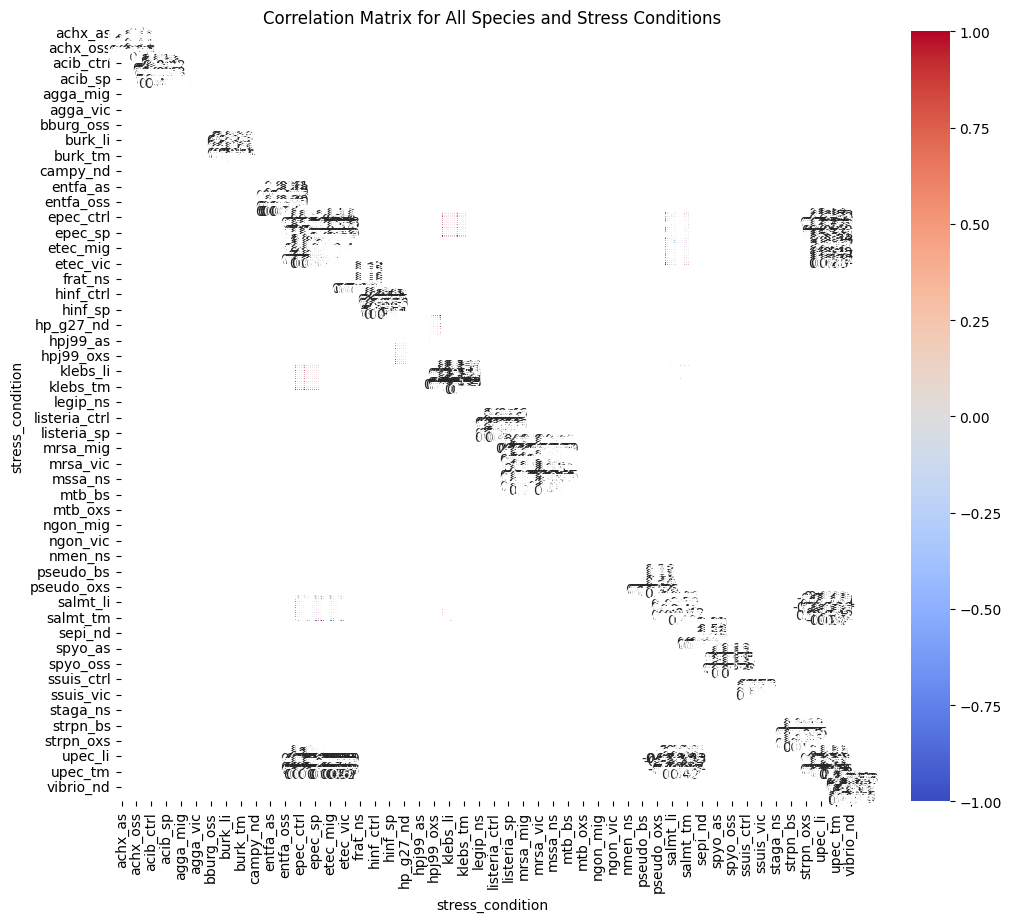

In [10]:
pivot_table = df.pivot_table(index='upstream200', columns='stress_condition', values='mean_tpm', aggfunc='mean')
pivot_table = pivot_table.dropna(axis=1, how='all')

correlation_matrix = pivot_table.corr()

# Set a threshold for strong correlations
threshold = 0.7

correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

correlated_df = pd.DataFrame(correlated_pairs, columns=['Stress Condition 1', 'Stress Condition 2', 'Correlation'])
print(correlated_df)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for All Species and Stress Conditions')
plt.show()

In [11]:
le_species = LabelEncoder()
le_stress = LabelEncoder()
df['species_encoded'] = le_species.fit_transform(df['species'])
df['stress_condition_encoded'] = le_stress.fit_transform(df['stress_condition'])

scaler = StandardScaler()
df['mean_tpm_standardized'] = scaler.fit_transform(df[['mean_tpm']])

X = df[['species_encoded', 'stress_condition_encoded']]
y = df['mean_tpm_standardized']

In [12]:
# Function to uniformly sample from each group
def uniform_sample(df, group_cols, n_samples_per_group=1):
    grouped = df.groupby(group_cols)
    sampled_df = grouped.apply(lambda x: x.sample(n=min(len(x), n_samples_per_group)))
    sampled_df = sampled_df.reset_index(drop=True)
    
    return sampled_df

group_cols = ['species']

# Number of samples to take from each group
n_samples_per_group = 20

sampled_df = uniform_sample(df, group_cols, n_samples_per_group)

/var/folders/24/jbn800492ks0n353ktq87jp00000gn/T/ipykernel_43160/631089978.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = grouped.apply(lambda x: x.sample(n=min(len(x), n_samples_per_group)))


## Random Forest

In [13]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
feature_names = ['species', 'stress_condition']
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

print(importance_df)

            feature  importance
0           species    0.646562
1  stress_condition    0.353438


## Mixed-Effects Model
- Fixed Effects: Coefficients for each stress condition indicate the average effect on TPM values.
- Random Effects: Variance components for species indicate how much of the variability in TPM values is attributable to species.

In [14]:
model = mixedlm("mean_tpm ~ C(stress_condition)", data=sampled_df, groups=sampled_df["species"])
result = model.fit()

print(result.summary())

                          Mixed Linear Model Regression Results
Model:                       MixedLM           Dependent Variable:           mean_tpm    
No. Observations:            27291             Method:                       REML        
No. Groups:                  2255              Scale:                        332062.3495 
Min. group size:             11                Log-Likelihood:               -214151.7997
Max. group size:             20                Converged:                    Yes         
Mean group size:             12.1                                                        
-----------------------------------------------------------------------------------------
                                        Coef.    Std.Err.   z    P>|z|   [0.025   0.975] 
-----------------------------------------------------------------------------------------
Intercept                                 77.000 1077.313  0.071 0.943 -2034.495 2188.496
C(stress_condition)[T.achx_li]      

### Random Effects (Species Level)

- Mean Effect: The overall mean effect across all species.
- Deviation from Mean: Each species has a random effect value indicating how much it deviates from the overall mean. A positive random effect means the species tends to have higher TPM values than the overall mean, while a negative random effect means it tends to have lower TPM values.

Example:
If the random effect for a species is 2.5, it means that the average TPM value for this species is 2.5 units higher than the overall mean TPM value. Conversely, if the random effect is -1.5, it means the average TPM value for this species is 1.5 units lower than the overall mean.

In [15]:
random_effects = result.random_effects
random_effects

{'Achromobacter xylosoxidans SOLR10': Group    0.000002
 dtype: float64,
 'Acinetobacter baumannii AB5075-UW': Group    4.553288e-12
 dtype: float64,
 'Aggregatibacter actinomycetemcomitans D7S-1': Group   -343.199069
 dtype: float64,
 'Aggregatibacter actinomycetemcomitans D7S-10': Group   -181.706415
 dtype: float64,
 'Aggregatibacter actinomycetemcomitans D7S-100': Group   -360.818211
 dtype: float64,
 'Aggregatibacter actinomycetemcomitans D7S-1000': Group   -192.406792
 dtype: float64,
 'Aggregatibacter actinomycetemcomitans D7S-1001': Group   -223.233501
 dtype: float64,
 'Aggregatibacter actinomycetemcomitans D7S-1002': Group   -194.776836
 dtype: float64,
 'Aggregatibacter actinomycetemcomitans D7S-1003': Group   -264.40276
 dtype: float64,
 'Aggregatibacter actinomycetemcomitans D7S-1004': Group   -326.434876
 dtype: float64,
 'Aggregatibacter actinomycetemcomitans D7S-1005': Group    935.508769
 dtype: float64,
 'Aggregatibacter actinomycetemcomitans D7S-1006': Group   -285.7

### Fixed Effects Coefficients:

The fixed effects in a mixed-effects model represent the average impact of each stress condition on TPM values, while controlling for the variability due to species. The magnitude of each fixed effect coefficient indicates the average change in the TPM value associated with that specific stress condition, relative to the reference level. Here's how to interpret them:

In [16]:
# Extract fixed effects
fixed_effects = result.fe_params
print(fixed_effects)

# Interpretation of Fixed Effects
print("\nInterpretation of Fixed Effects:")
for condition, effect in fixed_effects.items():
    if condition == 'Intercept':
        print(f"Intercept: {effect:.2f} (baseline level of TPM when all categorical variables are at their reference levels)")
    else:
        print(f"{condition}: {effect:.2f} (average change in TPM value associated with {condition}, relative to the reference level)")

Intercept                              77.000399
C(stress_condition)[T.achx_li]        -63.691662
C(stress_condition)[T.achx_mig]        62.257101
C(stress_condition)[T.achx_nd]        278.523073
C(stress_condition)[T.achx_ns]        451.354788
                                        ...     
C(stress_condition)[T.vibrio_oss]     655.098504
C(stress_condition)[T.vibrio_oxs]       5.448386
C(stress_condition)[T.vibrio_sp]      -10.890449
C(stress_condition)[T.vibrio_tm]      586.448682
C(stress_condition)[T.vibrio_vic]    2946.987563
Length: 290, dtype: float64

Interpretation of Fixed Effects:
Intercept: 77.00 (baseline level of TPM when all categorical variables are at their reference levels)
C(stress_condition)[T.achx_li]: -63.69 (average change in TPM value associated with C(stress_condition)[T.achx_li], relative to the reference level)
C(stress_condition)[T.achx_mig]: 62.26 (average change in TPM value associated with C(stress_condition)[T.achx_mig], relative to the reference level

The intercept represents the baseline TPM value when all categorical variables are at their reference levels (e.g., the mean TPM value for the reference stress condition).

Each coefficient for a stress condition indicates the average change in TPM value associated with that condition, relative to the reference level.
A positive coefficient indicates that the stress condition increases the TPM value compared to the reference level.
A negative coefficient indicates that the stress condition decreases the TPM value compared to the reference level.

*Example Interpretation*

If the intercept is 10.5, it means that the baseline TPM value (for the reference stress condition) is 10.5.
- achx_bs: If the coefficient for achx_bs is -3.2, it means that the achx_bs stress condition is associated with an average decrease of 3.2 in the TPM value compared to the reference level.
- vibrio_oss: If the coefficient for vibrio_oss is 4.5, it means that the vibrio_oss stress condition is associated with an average increase of 4.5 in the TPM value compared to the reference level.

### Normalize TPM Values
Adjust TPM values to remove the species-specific effects, which allows for more direct comparison across stress conditions:

In [17]:
df.drop(columns=['mean_tpm_standardized'], inplace=True, errors='ignore')

def normalize_group(group):
    scaler = StandardScaler()
    group['normalized_tpm'] = scaler.fit_transform(group[['mean_tpm']])
    return group

df = df.groupby('species').apply(normalize_group)

/var/folders/24/jbn800492ks0n353ktq87jp00000gn/T/ipykernel_43160/3192684189.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('species').apply(normalize_group)


### Identify Significant Stress Conditions
Focus on stress conditions with significant fixed effects to understand their impact:

In [18]:
pvalues = result.pvalues

# Identify significant stress conditions (e.g., p-value < 0.05)
significant_conditions = pvalues[pvalues < 0.05].index
significant_effects = fixed_effects[significant_conditions[:-1]]

print("Significant Stress Conditions and Their Effects:")
print(significant_effects)

Significant Stress Conditions and Their Effects:
C(stress_condition)[T.campy_as]    3054.079203
C(stress_condition)[T.epec_tm]     4967.663421
C(stress_condition)[T.mrsa_bs]     3398.235326
C(stress_condition)[T.mrsa_ns]     5993.916048
C(stress_condition)[T.nmen_as]     4102.682485
dtype: float64


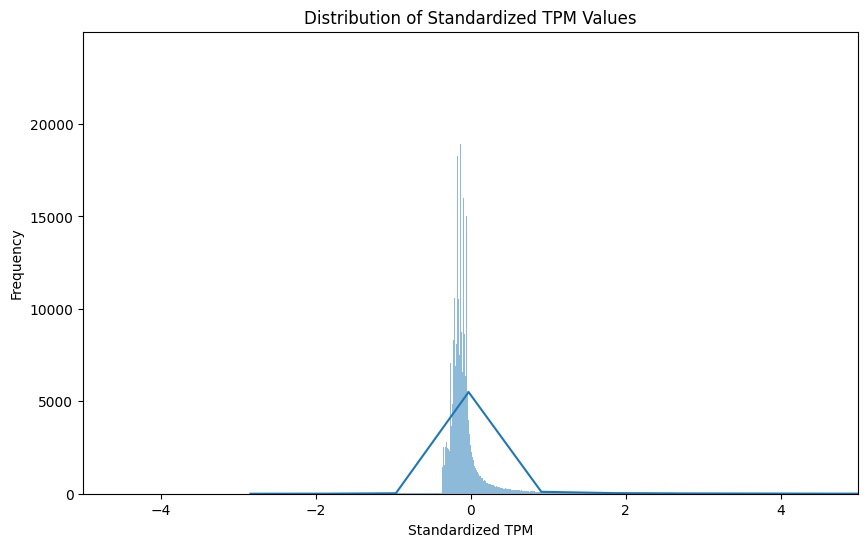

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['normalized_tpm'], kde=True)
plt.title('Distribution of Standardized TPM Values')
plt.xlabel('Standardized TPM')
plt.ylabel('Frequency')
plt.xlim(-5, 5)
plt.show()

The distribution shown in the plot resembles a Laplace distribution also known as the double exponential distribution. This distribution is characterized by its sharp peak at the mean (0 in this case) and its heavier tails compared to the normal distribution. The probability density function (PDF) of the Laplace distribution has the following form:

\[ f(x|\mu, b) = \frac{1}{2b} \exp\left(-\frac{|x - \mu|}{b}\right) \]

where \(\mu\) is the location parameter (mean), and \(b\) is the scale parameter (diversity).

In this plot, the distribution is centered at 0 with a high peak and rapid decay, typical of the Laplace distribution.